## Observations and Insights 

Observations
#### 1. Male and Female were equally represented in the trial.
#### 2. The two most promising drugs are Capomulin and Ramicane with the lowest final tumor volume.
#### 3. The lower the weight of the mouse, the smaller its tumor is.

In [57]:
%matplotlib inline

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = ('Mouse ID'))
# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
mouse_counts = combined_df['Mouse ID'].nunique()
mouse_counts

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_id = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_df[combined_df['Mouse ID'] == 'g989']
duplicated_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']


In [35]:
# Checking the number of mice in the clean DataFrame.
mouse_counts_2 = clean_df['Mouse ID'].nunique()
mouse_counts_2

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
grouped_dict = {'Mean Tumor Volume': tumor_mean,
                'Median Tumor Volume': tumor_median,
                'Tumor Volume Variance': tumor_variance,
                'Tumor Volume Std. Dev.': tumor_std,
                'Tumor Volume Std. Err.': tumor_sem}
drug_df = pd.DataFrame(grouped_dict)
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_data = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [38]:
#gather the data for the bar plots
mouse_per_drug = clean_df['Drug Regimen'].value_counts()
bar_yaxis = [x for x in mouse_per_drug]
bar_xaxis = clean_df['Drug Regimen'].unique()

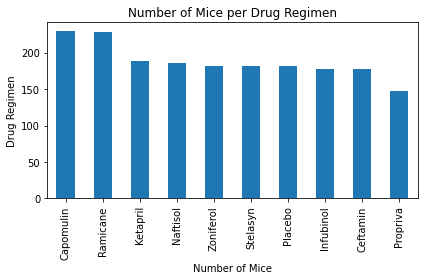

In [65]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_per_drug.plot(kind = 'bar')
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.tight_layout()
plt.show()

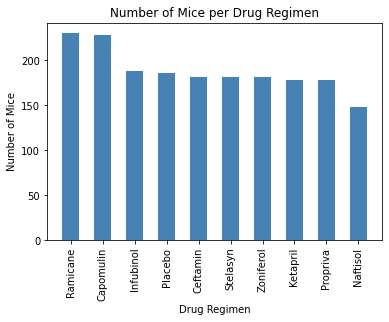

<Figure size 432x288 with 0 Axes>

In [66]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = np.arange(len(bar_xaxis))
width = .53
fig, ax = plt.subplots()
ax.bar(x, bar_yaxis, width, color = 'steelblue')
ax.set_title('Number of Mice per Drug Regimen')
ax.set_ylabel('Number of Mice')
ax.set_xlabel('Drug Regimen')
ax.set_xticks(x)
ax.set_xticklabels(bar_xaxis, rotation = 90)


plt.show()
plt.tight_layout()

In [67]:
#get the necessary data
mouse_gender = clean_df['Sex'].value_counts()
mouse_gender_num = [x for x in mouse_gender]
labels = clean_df['Sex'].unique()

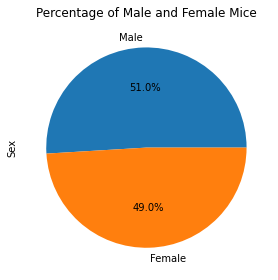

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage of Male and Female Mice')
plt.tight_layout()
plt.show()

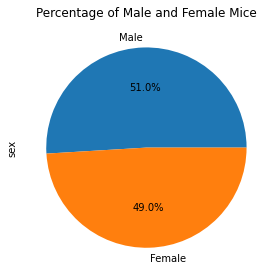

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_num,
    labels=labels,
    colors=None,
    autopct='%1.1f%%',)
plt.ylabel('sex')
plt.title('Percentage of Male and Female Mice')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_time_point = clean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_time_point, clean_df, how = 'left', on = ('Mouse ID','Timepoint'))
tumor_volume_df.head()
#final_tumor_volume.head(60)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume = []

for drug in treatments:
    tumor = (tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'])
    tumor_volume.append(tumor)
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq-1.5*iqr
    upper_bound = upperq+1.5*iqr
    outliers = [x for x in tumor if (x > upper_bound) | (x < lower_bound)]
    print(f'The possible outliers for {drug} are {outliers}')

The possible outliers for Capomulin are []
The possible outliers for Ramicane are []
The possible outliers for Infubinol are [36.321345799999996]
The possible outliers for Ceftamin are []


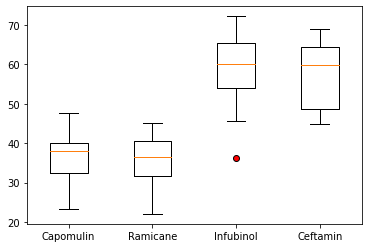

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(tumor_volume, labels = treatments, flierprops=red_circle)
plt.show()

## Line and Scatter Plots

In [73]:
#gathering the data
#line
line_y = clean_df.loc[clean_df['Mouse ID'] == 'l509', 'Tumor Volume (mm3)']
line_x = clean_df.loc[clean_df['Mouse ID'] == 'l509', 'Timepoint']
#scatter
cap_treatment_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
tumor_mean = cap_treatment_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
scat_weight = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == "Capomulin", 'Weight (g)']

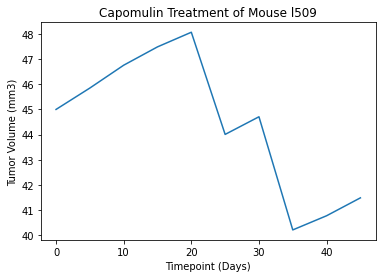

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(line_x, line_y)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

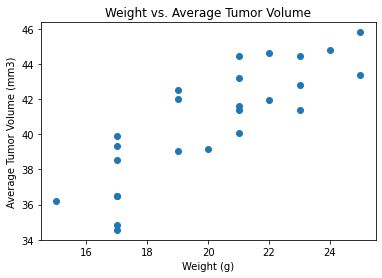

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#plt.scatter(scat_weight, scat_tumor)
plt.scatter(scat_weight, tumor_mean)
plt.title('Weight vs. Average Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

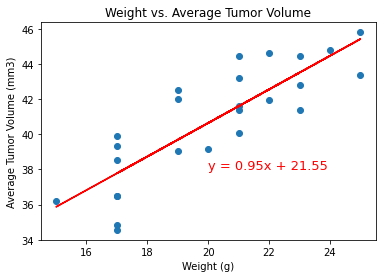

The correlation between mouse weight and the average tumor volume is 0.84


In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(scat_weight, tumor_mean)
regress_values = scat_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scat_weight,tumor_mean)
plt.plot(scat_weight,regress_values,"r-")
plt.annotate(line_eq, (20,38),fontsize=13,color="red")
plt.title('Weight vs. Average Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

